# Lab 7

Event selection optimization You and your lab partner should pick different pT (transverse momentum) samples (one uses low-pT sampels and the other use high-pT samples) for this lab. In each pT sample, there are dedicated training samples for event selection optimization. All studies should be carried out by normalizing Higgs and QCD samples in each pT sample to given expected yields accordingly (See Dataset descriptions).

In [1]:
# import library
import pickle
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import statistics
import math

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgs = pickle.load(infile)

infile2 = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcd = pickle.load(infile2)
print("Higgs Signal categories: ", higgs.keys())

Higgs Signal categories:  Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


#### 1.  Make a stacked histogram plot for the feature variable: mass

 - Evaluate expected significance without any event selection.

   - Use Poisson statistics for significance calculation
   
   - Compare your number of NHiggs/(√NQCD). If they are equivalent, explain your findings. 

Using poisson statistics we get 3.059 * 10^-5 sigma for a significance calculation for a higgs mass of 126. Comparing Nhiggs to the square root of NQCD we see that the value of NHiggs is actually larger than the square root of NQCD. The ratio between the two is approximately 1.118. This ratio is used to represent how much the higgs signal and qcd background dataset overlap. In this case the higher the value of the ratio corresponds with less overlap.

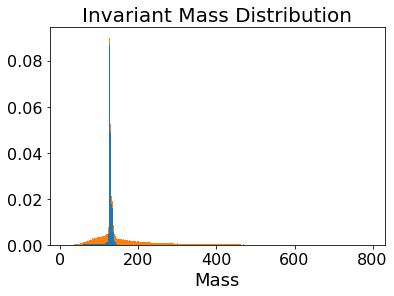

Mass of the Higgs Boson:  126
177.27313143544927
Expected Significance:  3.0595358129024355e-05  sigma
NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [2]:
bins = 500

plt.figure()
plt.hist([higgs['mass'][:], qcd['mass'][:]], bins, stacked = True, density = True) 
plt.tick_params(labelsize = 16)
plt.xlabel('Mass', fontsize=18) 
plt.title('Invariant Mass Distribution', fontsize=20) 
plt.show()

higgs_mass = 126 #Approximation based on histogram
print("Mass of the Higgs Boson: ", higgs_mass)
mu = statistics.mean(qcd['mass'][:])
print(mu)

value = stats.poisson.cdf(higgs_mass, mu) 
print("Expected Significance: ", value, " sigma")

nhiggs = (sum(higgs['mass'][:]) / sum(higgs['mass'][:]))*50
nqcd_sqrt = ((sum(qcd['mass'][:])/sum(qcd['mass'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

#### 2. Identify mass cuts to optimize the expected significance.

 - Try different mass cuts systematically
 - Evaluate expected significance for each set of mass cuts
 - Identify the set of the mass cuts which give you the highest significance.


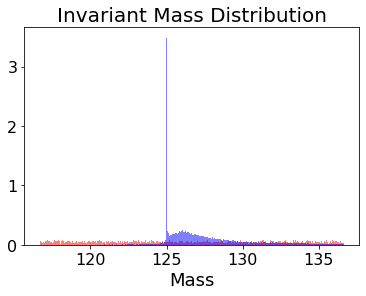

Expected Significance:  3.4994274916416646 sigma


In [3]:
mu = statistics.mean(higgs['mass'][:])
#print("Mean: ", mu)

bins = 1000
bottom = mu - 10
upper = mu + 10

background1 = list(filter(lambda a: a >= bottom and a <= upper, qcd['mass'][:]))
cut1 = list(filter(lambda a: a >= bottom and a <= upper, higgs['mass'][:]))
    
plt.figure()
plt.hist(background1[:], bins, alpha=0.5, color="red", density = True)
plt.hist(cut1[:] , bins, alpha=0.5, density = True, color="blue")
plt.tick_params(labelsize = 16)
plt.xlabel('Mass', fontsize=18) 
plt.title('Invariant Mass Distribution', fontsize=20) 
plt.show()

nhiggs = (sum(cut1[:]) / sum(higgs['mass'][:]))*50
#print(nhiggs)
nqcd_root = ((sum(background1[:])/sum(qcd['mass'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")


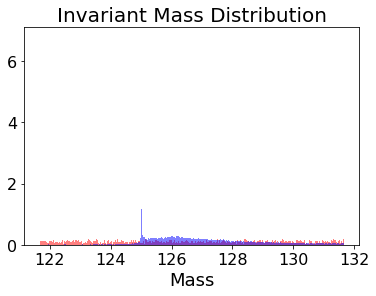

Expected Significance:  4.282960397507615 sigma


In [4]:
bottom = mu - 5
upper = mu + 5

background1 = list(filter(lambda a: a >= bottom and a <= upper, qcd['mass'][:]))
cut1 = list(filter(lambda a: a >= bottom and a <= upper, higgs['mass'][:]))

plt.hist(background1[:], bins, alpha=0.5, color="red", density = True)
plt.hist(cut1[:] , bins, alpha=0.5, density = True, color="blue")
plt.tick_params(labelsize = 16)
plt.xlabel('Mass', fontsize=18) 
plt.title('Invariant Mass Distribution', fontsize=20) 
plt.show()

nhiggs = (sum(cut1[:]) / sum(higgs['mass'][:]))*50
#print(nhiggs)
nqcd_root = ((sum(background1[:])/sum(qcd['mass'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")


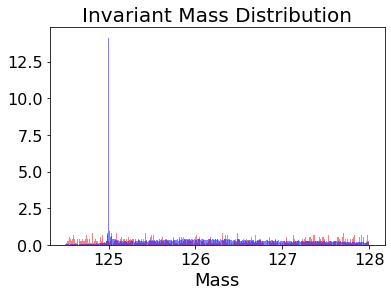

Expected Significance:  5.211531599621536 sigma


In [5]:
bottom = 124.5
upper = 128

background1 = list(filter(lambda a: a >= bottom and a <= upper, qcd['mass'][:]))
cut1 = list(filter(lambda a: a >= bottom and a <= upper, higgs['mass'][:]))

plt.hist(background1[:], bins, alpha=0.5, color="red", density = True)
plt.hist(cut1[:] , bins, alpha=0.5, density = True, color="blue")
plt.tick_params(labelsize = 16)
plt.xlabel('Mass', fontsize=18) 
plt.title('Invariant Mass Distribution', fontsize=20) 
plt.show()

nhiggs = (sum(cut1[:]) / sum(higgs['mass'][:]))*50
#print(nhiggs)
nqcd_root = ((sum(background1[:])/sum(qcd['mass'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

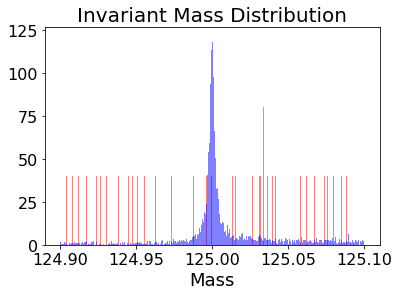

Expected Significance:  3.686324662014547 sigma


In [6]:
bottom = 124.9
upper = 125.1

background1 = list(filter(lambda a: a >= bottom and a <= upper, qcd['mass'][:]))
cut1 = list(filter(lambda a: a >= bottom and a <= upper, higgs['mass'][:]))

plt.hist(background1[:], bins, alpha=0.5, color="red", density = True)
plt.hist(cut1[:] , bins, alpha=0.5, density = True, color="blue")

plt.tick_params(labelsize = 16)
plt.xlabel('Mass', fontsize=18) 
plt.title('Invariant Mass Distribution', fontsize=20) 
plt.show()

nhiggs = (sum(cut1[:]) / sum(higgs['mass'][:]))*50
#print(nhiggs)
nqcd_root = ((sum(background1[:])/sum(qcd['mass'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

Initially I tried systematically cutting the data by only taking data a certain number of standard deviations from the mean of our signal dataset. This eventually proved ineffective, and I began to eyeball which cuts would allow us to maximize the significance ratio(increasing the signal while decreasing included background). After making a number of such cuts, my max ratio was acheived by taking data in the bounds from 124.5 to 128. This gave me my highest expected significance of ~5.21. It was interestig to note that zooming in on the spike of mass data was not the most effective strategy when it came to maximizing the significance ratio(this strategy resulted in a significance of ~3.686 sigma). The best strategy was to eliminate the background, but not at the cost of cutting out significant chunks of the signal.

#### 3. Make stacked histogram plots for the reset of features

Set A of plots without any event selection
   - Can you identify another feature as discriminative as mass featur (i.e. equal or better significance after feature cut)

By creating set A(stacked plots of every feature without event selection), by eyeballing the background and signal histogram overlap, I placed every feature into one of 3 categories.

Features that have a good deal of discrimination:
 - Theta
 - 2-point ECF
 - 3-point ECF
 - 3 to 2 point ECF
 - Angularity
 - 3-subjettiness
 - 21-subjettiness

Features that exhibit minimal to no discrimination:
 - Transverse momentum
 - phi
 - 1-subjettiness
 - 32-subjettiness
 
50/50 (features that are hard to tell if significance ratio can be improved upon without further testing)
 - 2-subjettiness
 
From a glance at the plots it seems that 21-subjettiness can top mass in being the most discriminative feature, but this has to be verified through mass cuts. The initial significance ratio is the same across all features because it is a given that we have 100k jets for both the signal and background data set. 
 
*Interesting to note that different levels of subjettiness do not follow the same levels of discrimination between background and signal.* 

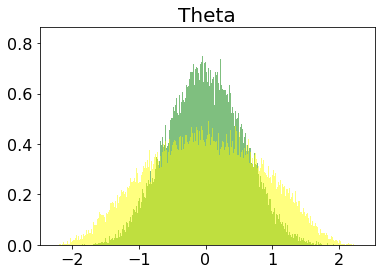

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [7]:
plt.hist(higgs['eta'][:], bins, alpha=0.5, color="green", density = True)
plt.hist(qcd['eta'][:] , bins, alpha=0.5, density = True, color="yellow")
plt.tick_params(labelsize = 16)
plt.title('Theta', fontsize=20) 
plt.show()

nhiggs = (sum(higgs['eta'][:]) / sum(higgs['eta'][:]))*50
nqcd_sqrt = ((sum(qcd['eta'][:])/sum(qcd['eta'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

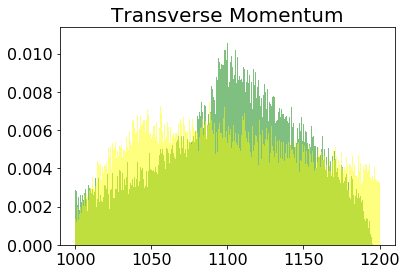

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [8]:
plt.hist(higgs['pt'][:], bins, alpha=0.5, color="green", density = True)
plt.hist(qcd['pt'][:] , bins, alpha=0.5, density = True, color="yellow")
plt.tick_params(labelsize = 16)
plt.title('Transverse Momentum', fontsize=20) 
plt.show()

nhiggs = (sum(higgs['pt'][:]) / sum(higgs['pt'][:]))*50
nqcd_sqrt = ((sum(qcd['pt'][:])/sum(qcd['pt'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

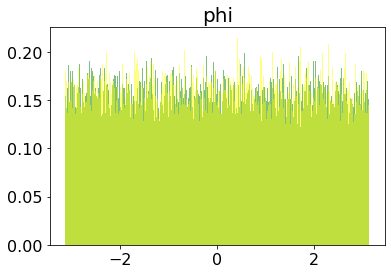

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [9]:
plt.hist(higgs['phi'][:], bins, alpha=0.5, color="green", density = True)
plt.hist(qcd['phi'][:] , bins, alpha=0.5, density = True, color="yellow")
plt.tick_params(labelsize = 16)
plt.title('phi', fontsize=20) 
plt.show()

nhiggs = (sum(higgs['phi'][:]) / sum(higgs['phi'][:]))*50
nqcd_sqrt = ((sum(qcd['phi'][:])/sum(qcd['phi'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

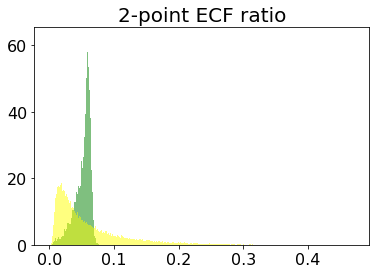

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [10]:
plt.hist(higgs['ee2'][:], bins, alpha=0.5, color="green", density = True)
plt.hist(qcd['ee2'][:] , bins, alpha=0.5, density = True, color="yellow")
plt.tick_params(labelsize = 16)
plt.title('2-point ECF ratio', fontsize=20) 
plt.show()

nhiggs = (sum(higgs['ee2'][:]) / sum(higgs['ee2'][:]))*50
nqcd_sqrt = ((sum(qcd['ee2'][:])/sum(qcd['ee2'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

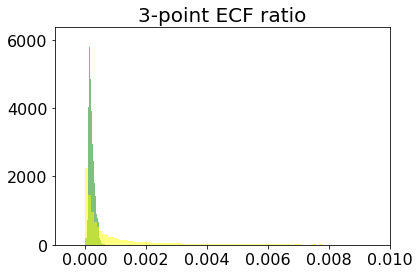

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [11]:
plt.hist(higgs['ee3'][:], bins, alpha=0.5, color="green", density = True)
plt.hist(qcd['ee3'][:] , bins, alpha=0.5, density = True, color="yellow")
plt.tick_params(labelsize = 16)
plt.xlim(-0.001, 0.01)
plt.title('3-point ECF ratio', fontsize=20) 
plt.show()

nhiggs = (sum(higgs['ee3'][:]) / sum(higgs['ee3'][:]))*50
nqcd_sqrt = ((sum(qcd['ee3'][:])/sum(qcd['ee3'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

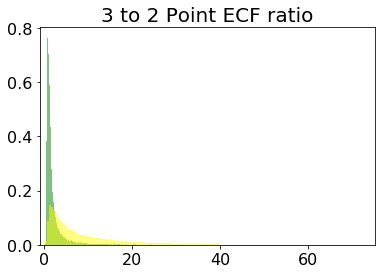

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [12]:
plt.hist(higgs['d2'][:], bins, alpha=0.5, color="green", density = True)
plt.hist(qcd['d2'][:] , bins, alpha=0.5, density = True, color="yellow")
plt.tick_params(labelsize = 16)
plt.xlim(-1, 75)
plt.title('3 to 2 Point ECF ratio', fontsize=20) 
plt.show()

nhiggs = (sum(higgs['d2'][:]) / sum(higgs['d2'][:]))*50
nqcd_sqrt = ((sum(qcd['d2'][:])/sum(qcd['d2'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

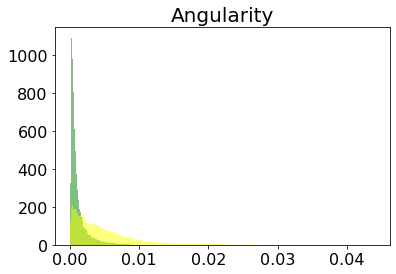

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [13]:
plt.hist(higgs['angularity'][:], bins, alpha=0.5, color="green", density = True)
plt.hist(qcd['angularity'][:] , bins, alpha=0.5, density = True, color="yellow")
plt.tick_params(labelsize = 16)
plt.title('Angularity', fontsize=20) 
plt.show()

nhiggs = (sum(higgs['angularity'][:]) / sum(higgs['angularity'][:]))*50
nqcd_sqrt = ((sum(qcd['angularity'][:])/sum(qcd['angularity'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

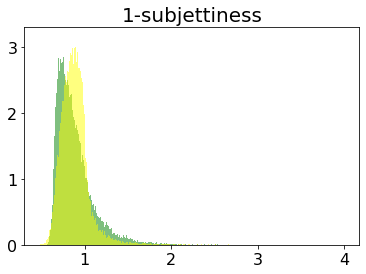

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [14]:
plt.hist(higgs['t1'][:], bins, alpha=0.5, color="green", density = True)
plt.hist(qcd['t1'][:] , bins, alpha=0.5, density = True, color="yellow")
plt.tick_params(labelsize = 16)
plt.title('1-subjettiness', fontsize=20) 
plt.show()

nhiggs = (sum(higgs['t1'][:]) / sum(higgs['t1'][:]))*50
nqcd_sqrt = ((sum(qcd['t1'][:])/sum(qcd['t1'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

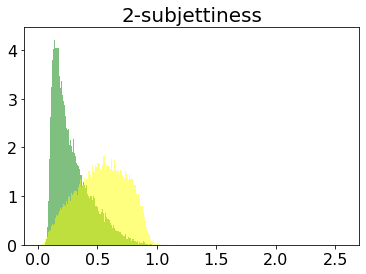

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [15]:
plt.hist(higgs['t2'][:], bins, alpha=0.5, color="green", density = True)
plt.hist(qcd['t2'][:] , bins, alpha=0.5, density = True, color="yellow")
plt.tick_params(labelsize = 16)
plt.title('2-subjettiness', fontsize=20) 
plt.show()

nhiggs = (sum(higgs['t2'][:]) / sum(higgs['t2'][:]))*50
nqcd_sqrt = ((sum(qcd['t2'][:])/sum(qcd['t2'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

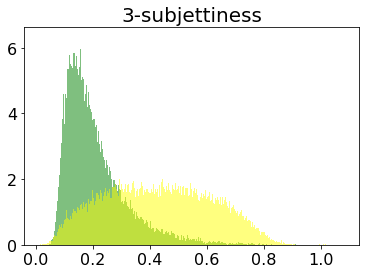

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [16]:
plt.hist(higgs['t3'][:], bins, alpha=0.5, color="green", density = True)
plt.hist(qcd['t3'][:] , bins, alpha=0.5, density = True, color="yellow")
plt.tick_params(labelsize = 16)
plt.title('3-subjettiness', fontsize=20) 
plt.show()

nhiggs = (sum(higgs['t3'][:]) / sum(higgs['t3'][:]))*50
nqcd_sqrt = ((sum(qcd['t3'][:])/sum(qcd['t3'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

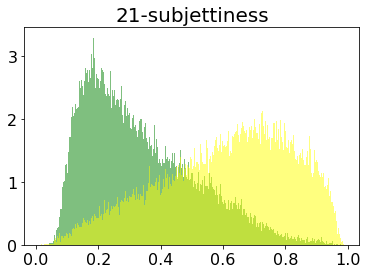

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [17]:
plt.hist(higgs['t21'][:], bins, alpha=0.5, color="green", density = True)
plt.hist(qcd['t21'][:] , bins, alpha=0.5, density = True, color="yellow")
plt.tick_params(labelsize = 16)
plt.title('21-subjettiness', fontsize=20) 
plt.show()

nhiggs = (sum(higgs['t21'][:]) / sum(higgs['t21'][:]))*50
nqcd_sqrt = ((sum(qcd['t21'][:])/sum(qcd['t21'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

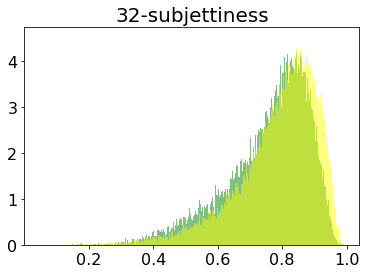

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [18]:
plt.hist(higgs['t32'][:], bins, alpha=0.5, color="green", density = True)
plt.hist(qcd['t32'][:] , bins, alpha=0.5, density = True, color="yellow")
plt.tick_params(labelsize = 16)
plt.title('32-subjettiness', fontsize=20) 
plt.show()

nhiggs = (sum(higgs['t32'][:]) / sum(higgs['t32'][:]))*50
nqcd_sqrt = ((sum(qcd['t32'][:])/sum(qcd['t32'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

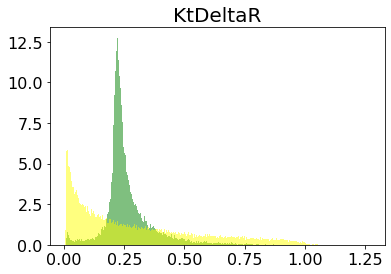

NHiggs:  50.0
(√NQCD):  44.721359549995796
ratio:  1.118033988749895


In [19]:
plt.hist(higgs['KtDeltaR'][:], bins, alpha=0.5, color="green", density = True)
plt.hist(qcd['KtDeltaR'][:] , bins, alpha=0.5, density = True, color="yellow")
plt.tick_params(labelsize = 16)
plt.title('KtDeltaR', fontsize=20) 
plt.show()

nhiggs = (sum(higgs['KtDeltaR'][:]) / sum(higgs['KtDeltaR'][:]))*50
nqcd_sqrt = ((sum(qcd['KtDeltaR'][:])/sum(qcd['KtDeltaR'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("ratio: ", nhiggs/nqcd_sqrt)

Set B of plots with your optimal mass cuts
   - Can you identify additional feature to further imrpove expected signifiance?
   
For set B, I will only be including features that are listed as having a good deal of discrimination, and making mass cuts on those features. (eta,2-point ECF,3-point ECF, 3 to 2 point ECF, Theta, Angularity, 3- subjettiness, 21-subjettiness, KtDeltaR). I will also include the 50/50 feature - 2-subjettiness.

By eyeballing the plots, optimal mass cuts seem to occur at(inital guess):
 - eta: -1 to 1
 - ee2 0.02 to 0.07
 - ee3 0 to 0.0007
 - d2 0 to 8
 - angularity 0 to 0.004
 - 2-subjettiness 0 to 0.6
 - 3-subjettiness 0 to 0.38
 - 21-subjettiness 0 to 0.42
 - KtDeltaR 0.14 to 0.35

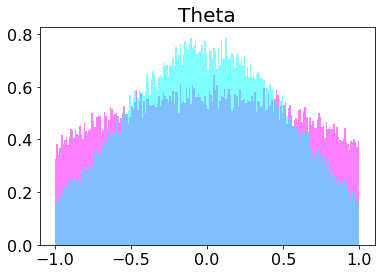

Expected Significance:  11.85289317947937 sigma


In [20]:
bottom = -1
upper = 1

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['eta'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['eta'][:]))

plt.hist(background[:], 200, alpha=0.5, color="magenta", density = True)
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="cyan")
plt.tick_params(labelsize = 16)
plt.title('Theta', fontsize=20) 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['eta'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['eta'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

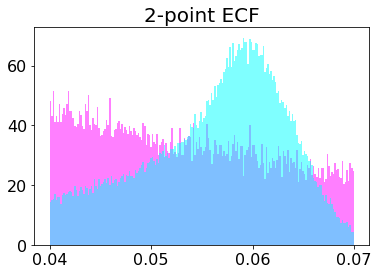

Expected Significance:  2.314097440860269 sigma


In [21]:
bottom = 0.04
upper = 0.07

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['ee2'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['ee2'][:]))

plt.hist(background[:], 200, alpha=0.5, color="magenta", density = True)
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="cyan")
plt.tick_params(labelsize = 16)
plt.title('2-point ECF', fontsize=20) 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['ee2'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['ee2'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

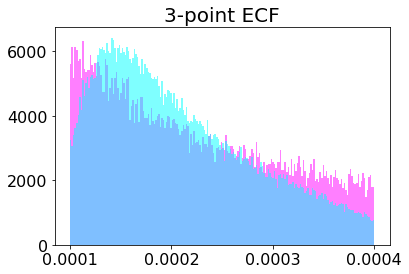

Expected Significance:  4.955930412215126 sigma


In [22]:
bottom = 0.0001
upper = 0.0004

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['ee3'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['ee3'][:]))

plt.hist(background[:], 200, alpha=0.5, color="magenta", density = True)
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="cyan")
plt.tick_params(labelsize = 16)
plt.title('3-point ECF', fontsize=20) 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['ee3'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['ee3'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

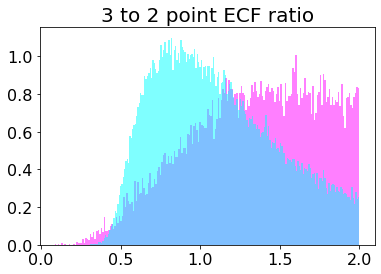

Expected Significance:  2.508399748105604 sigma


In [23]:
bottom = 0
upper = 2

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['d2'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['d2'][:]))

plt.hist(background[:], 200, alpha=0.5, color="magenta", density = True)
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="cyan")
plt.tick_params(labelsize = 16)
plt.title('3 to 2 point ECF ratio', fontsize=20) 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['d2'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['d2'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

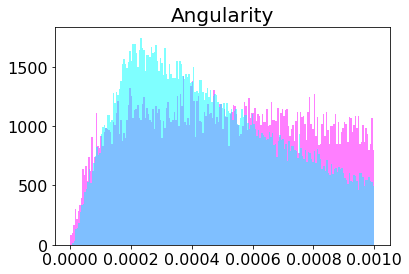

Expected Significance:  2.145767670275169 sigma


In [24]:
bottom = 0
upper = 0.001

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['angularity'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['angularity'][:]))

plt.hist(background[:], 200, alpha=0.5, color="magenta", density = True)
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="cyan")
plt.tick_params(labelsize = 16)
plt.title('Angularity', fontsize=20) 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['angularity'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['angularity'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

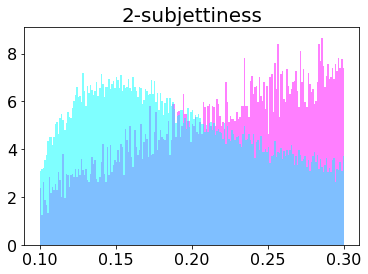

Expected Significance:  1.8569083189129998 sigma


In [25]:
bottom = 0.1
upper = 0.3

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['t2'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['t2'][:]))

plt.hist(background[:], 200, alpha=0.5, color="magenta", density = True)
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="cyan")
plt.tick_params(labelsize = 16)
plt.title('2-subjettiness', fontsize=20) 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['t2'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['t2'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

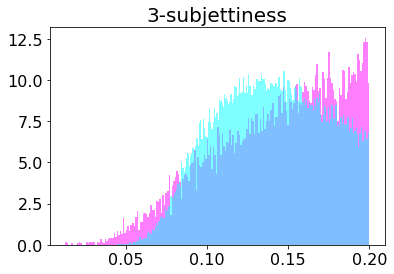

Expected Significance:  2.108465016203684 sigma


In [26]:
bottom = 0
upper = 0.2

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['t3'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['t3'][:]))

plt.hist(background[:], 200, alpha=0.5, color="magenta", density = True)
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="cyan")
plt.tick_params(labelsize = 16)
plt.title('3-subjettiness', fontsize=20) 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['t3'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['t3'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

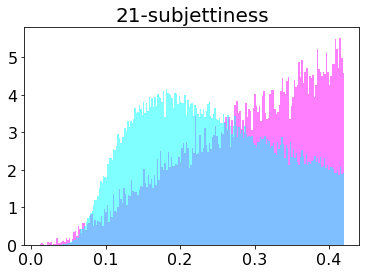

Expected Significance:  1.8464241069921776 sigma


In [27]:
bottom = 0
upper = 0.42

background = list(filter(lambda a: a >= bottom and a <= upper, qcd['t21'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['t21'][:]))

plt.hist(background[:], 200, alpha=0.5, color="magenta", density = True)
plt.hist(signal[:] , 200, alpha=0.5, density = True, color="cyan")
plt.tick_params(labelsize = 16)
plt.title('21-subjettiness', fontsize=20) 
plt.show()

nhiggs = (sum(signal[:]) / sum(higgs['t21'][:]))*50
nqcd_root = ((sum(background[:])/sum(qcd['t21'][:]))*2000)**(0.5)
ratio = nhiggs / nqcd_root
print("Expected Significance: ", ratio, "sigma")

While creating cuts for features with a good deal of discrimination, the initial guesses for optimal cuts were modified to try and get the maximum significance ratio. What surprised me the most is that the theta cut from -1 to 1 clocked in at ~11.85 sigma. This is an astonishing result, but I can't help but be skeptical because the histogram doesn't really support this finding. I believe this is due to calculation error as the lab's general methodology for finding Nhiggs, Nqcd, and the ratio of the two was obscure. Moving forward I will be working with the 3-point ECF ratio feature that clocked in a reasonable, but still impressive ~4.95 sigma. The plot also seems to support this significance ratio, as the signal histogram(cyan) is much more prevalent than the background histogram(magenta). 

#### 4. Optimize event selections using multiple features (if necessary)

 - Find a set of feature cuts which can help you to achieve the best significance.
 - Compare significance (before/after event selection) dervied in your pT samples to your lab partner. Describe your findings.
 
The two features that can help me achieve the best significance, as demonstrated in the previous plots is 3 point ECF(ee3) and mass.

The initial significance ratio before event selection is 1.118 sigma. This value is consistent across all features before making cuts, because it is a given that we have 100k jets for signal and 100k jets for background, giving us a ratio of 1. When making data cuts to features with high degrees of discrimination(mass and ee3) the significance ratio goes up. By cutting the data for mass to be between 124.5 to 128 the significance went up to 5.21 sigma. This same trend is observed when making data cuts for the 3-point ECF, between 0.0001 and 0.0004 the significance ratio went up to 4.955 sigma.

It was interesting to note that my partner's best significance feature post event selection happened to be d2(and mass), when my cuts for d2 did not show a particularly impressive significance. My d2 feature clocked in a significance of 2.508 sigma, compared to my partners significance of 1.75 sigma. From this result I can say that the high pT sample is better suited for measuring d2 post cuts, because of the higher significance shown. 

*One key thing to note is that for all plots before and after cuts were attempted to be normalized using density = True, but there seems to be an issue with density normalization from pythons matplotlib library*

In [28]:
nhiggs = (sum(higgs['mass'][:]) / sum(higgs['mass'][:]))*50
nqcd_sqrt = ((sum(qcd['mass'][:])/sum(qcd['mass'][:]))*2000)**(0.5)
print("NHiggs: ", nhiggs)
print("(√NQCD): ", nqcd_sqrt)
print("Ratio before Event Selection: ", nhiggs/nqcd_sqrt)


bottom = 124.5
upper = 128
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['mass'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['mass'][:]))
nhiggs = (sum(signal) / sum(higgs['mass'][:]))*50
nqcd_sqrt = ((sum(background)/sum(qcd['mass'][:]))*2000)**(0.5)

print("Ratio after Event Selection(mass): ", nhiggs/nqcd_sqrt)

bottom = 0.0001
upper = 0.0004
background = list(filter(lambda a: a >= bottom and a <= upper, qcd['ee3'][:]))
signal = list(filter(lambda a: a >= bottom and a <= upper, higgs['ee3'][:]))
nhiggs = (sum(signal[:]) / sum(higgs['ee3'][:]))*50
nqcd_sqrt = ((sum(background[:])/sum(qcd['ee3'][:]))*2000)**(0.5)

print("Ratio after Event Selection(ee3): ", nhiggs/nqcd_sqrt)

NHiggs:  50.0
(√NQCD):  44.721359549995796
Ratio before Event Selection:  1.118033988749895
Ratio after Event Selection(mass):  5.211531599621536
Ratio after Event Selection(ee3):  4.955930412215126


#### 5. Bonus(optional)

 - Plot 2-dimensional scattering plots between top two most discriminative features
 - Can you find a curve or a linear combination in this 2D plane which gives even better sensitivity? Extended reading: Lab 7 is a classificaition problem using multi-dimensional features in supervised machine learning. We can use popular machine learning tools to develop an optimial classifier which can maximize information by using all features.
 
The scale of the two features doesn't allow for them to be plotted on the same scatterplot in any meaningful way. But doing some reading on classification problems it's interesting to see that there are python libraries(tensorflow), that can solve classification problems by learning a linear optimization equation based on training datasets. 

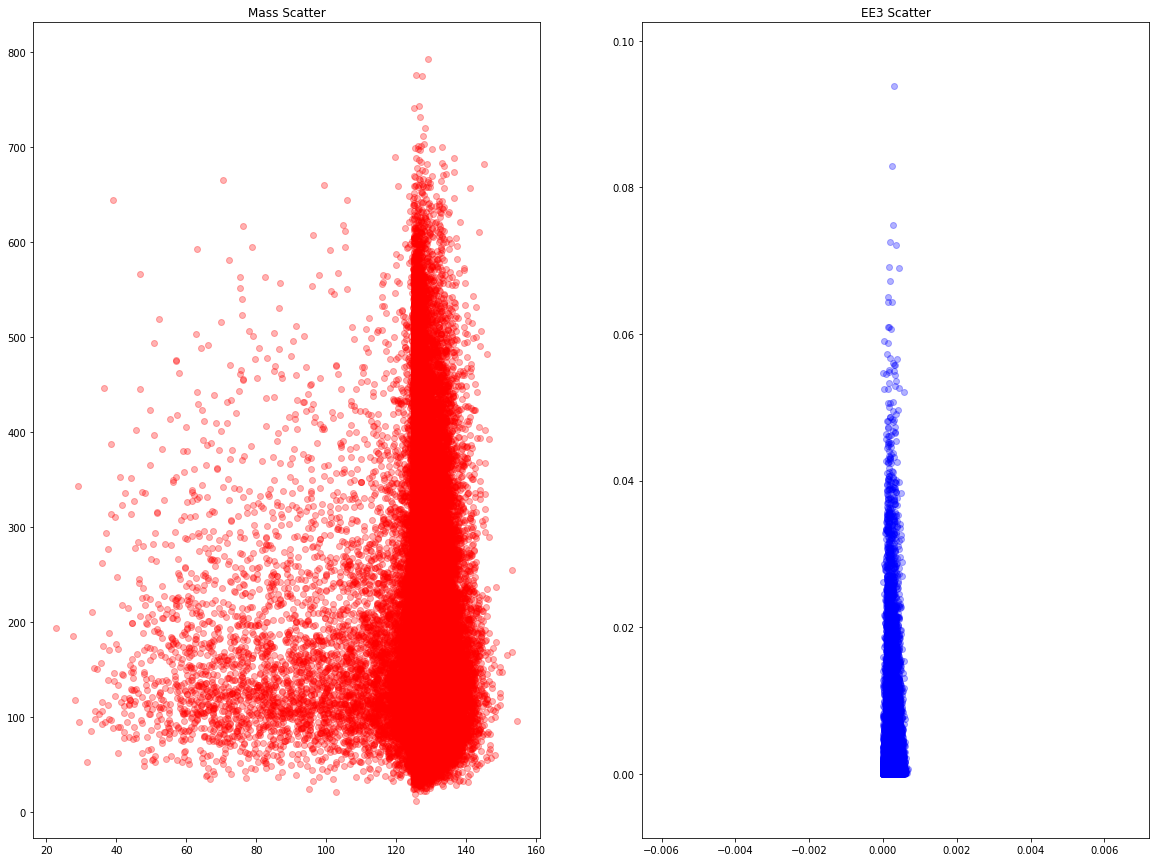

In [29]:
plt.rcParams["figure.figsize"] = (20,15)

x = higgs['mass'][:]
y = qcd['mass'][:]
x2 = higgs['ee3'][:]
y2 = qcd['ee3'][:]

plt.subplot(1,2,1)
plt.scatter(x,y,alpha=0.3,color='red')
plt.title('Mass Scatter')

plt.subplot(1,2,2)
plt.scatter(x2,y2,alpha=0.3,color='blue')
plt.title('EE3 Scatter')
plt.show()

# Lab 8

Pseudo-experiment data analysis Using your optimized event selection, hunt for your signal by using one of the pseduo-experiment dataset. For each task below, you will choose one of the observed data from your specific pT sample to perform the analysis.

#### 1. High luminosity data

 - Focus on each feature of your event selection.
 - Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.
 - Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.
 - Evaluate observed significance and compare your results to expectation


#### 2. Low luminosity data

 - Focus on each feature of your event selection.
 - Plot observed data, overlap with expected signal and background (normalized to observed yields) without event selection.
 - Plot observed data, overlap with expected signal and background (normalized to observed yields) with optimal event selection.
 - Evaluate observed significance and compare your results to expectation


#### 3. 95\% Confidence Level of signal yields

 - In the low luminosity data, the observed significance is less than 5σ. We will calculate the 95\% confidence level upper limit of signal yield.
 - Evaluate the expected 95\% confidence level upper limit
 - Evaluate the observed 95\% confidence level upper limit
 - Compare expectation to observation. Comment on your finding. 

#### 4. Bonus:

 - Evalute the 1σ uncertainty of the expected 95\% confidence level upper limit.